# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Nadita Febianti
- **Email:** M180D4KX2252@bangkit.academy
- **ID Dicoding:** nadita_febianti

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1
Apakah terdapat perbedaan dalam jumlah penyewaan sepeda (cnt) antara tahun 2011 dan 2012?
- Pertanyaan 2
Apakah kecenderungan jumlah penyewaan sepeda (cnt) berbeda antara hari kerja (workingday) dan hari libur (holiday)?
- Pertanyaan 3
Bagaimana pengaruh kelembaban udara (hum) dan kecepatan angin (windspeed) terhadap jumlah penyewaan sepeda (cnt)?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression

## Data Wrangling

### Gathering Data

In [2]:
day_df = pd.read_csv('day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
hour_df = pd.read_csv('hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

Menilai Data

In [4]:
day_df.info()
#terdapat masalah pada kolom dteday, seharusnya dtype nya adalah datetime

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
hour_df.info()
#terdapat masalah pada kolom dteday, seharusnya dtype nya adalah datetime

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


CEK MISSING VALUE

In [6]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

CEK DUPLIKASI DATA

In [8]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [9]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


CEK PARAMETER STATISTIK

In [10]:
print(day_df.describe())

          instant      season          yr        mnth     holiday     weekday  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean   366.000000    2.496580    0.500684    6.519836    0.028728    2.997264   
std    211.165812    1.110807    0.500342    3.451913    0.167155    2.004787   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.500000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    366.000000    3.000000    1.000000    7.000000    0.000000    3.000000   
75%    548.500000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    731.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.683995    1.395349    0.495385    0.474354    0.627894    0.190486   
std      0.465233    0.5448

In [11]:
print(hour_df.describe())

          instant        season            yr          mnth            hr  \
count  17379.0000  17379.000000  17379.000000  17379.000000  17379.000000   
mean    8690.0000      2.501640      0.502561      6.537775     11.546752   
std     5017.0295      1.106918      0.500008      3.438776      6.914405   
min        1.0000      1.000000      0.000000      1.000000      0.000000   
25%     4345.5000      2.000000      0.000000      4.000000      6.000000   
50%     8690.0000      3.000000      1.000000      7.000000     12.000000   
75%    13034.5000      3.000000      1.000000     10.000000     18.000000   
max    17379.0000      4.000000      1.000000     12.000000     23.000000   

            holiday       weekday    workingday    weathersit          temp  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.028770      3.003683      0.682721      1.425283      0.496987   
std        0.167165      2.005771      0.465431      0.639357      0.

### Cleaning Data

Mengatasi Tipe Data yang Tidak Sesuai Yaitu dteday Harusnya datetime

In [12]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

In [13]:
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

Cek Apakah Tipe Data Sudah Berubah

In [14]:
day_df.info()
#sudah berubah

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [15]:
hour_df.info()
#sudah berubah

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

## Exploratory Data Analysis (EDA)

### Explore ...

Melakukan merged data sesuai dengan dteday nya

In [16]:
# Menggabungkan kedua dataset berdasarkan kolom 'dteday'
merged_data = pd.concat([day_df.set_index('dteday'), hour_df.set_index('dteday')], axis=1)

In [17]:
# Cek hasil penggabungan dataset
print(merged_data.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17379 entries, 2011-01-01 to 2012-12-31
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   season      17379 non-null  int64  
 2   yr          17379 non-null  int64  
 3   mnth        17379 non-null  int64  
 4   holiday     17379 non-null  int64  
 5   weekday     17379 non-null  int64  
 6   workingday  17379 non-null  int64  
 7   weathersit  17379 non-null  int64  
 8   temp        17379 non-null  float64
 9   atemp       17379 non-null  float64
 10  hum         17379 non-null  float64
 11  windspeed   17379 non-null  float64
 12  casual      17379 non-null  int64  
 13  registered  17379 non-null  int64  
 14  cnt         17379 non-null  int64  
 15  instant     17379 non-null  int64  
 16  season      17379 non-null  int64  
 17  yr          17379 non-null  int64  
 18  mnth        17379 non-null  int64  
 19  hr      

In [18]:
# Menyimpan dataset hasil penggabungan ke dalam file CSV
merged_data.to_csv('merged_data.csv')

In [19]:
merged_data = pd.read_csv('merged_data.csv')

# Menghitung total penyewaan sepeda (cnt) untuk tahun 2011 dan 2012
total_rentals_2011 = merged_data[merged_data['yr'] == 0]['cnt'].sum()
total_rentals_2012 = merged_data[merged_data['yr'] == 1]['cnt'].sum()

# Hasil
print("Total penyewaan sepeda tahun 2011:", total_rentals_2011)
print("Total penyewaan sepeda tahun 2012:", total_rentals_2012)

# Membandingkan total penyewaan sepeda antara tahun 2011 dan 2012
if total_rentals_2011 > total_rentals_2012:
    print("Tahun 2011 memiliki total penyewaan sepeda lebih tinggi.")
elif total_rentals_2011 < total_rentals_2012:
    print("Tahun 2012 memiliki total penyewaan sepeda lebih tinggi.")
else:
    print("Tidak ada perbedaan dalam total penyewaan sepeda antara tahun 2011 dan 2012.")

Total penyewaan sepeda tahun 2011: 29665268
Total penyewaan sepeda tahun 2012: 49125782
Tahun 2012 memiliki total penyewaan sepeda lebih tinggi.


In [20]:
#CEK UNTUK APAKAH ADA PERBEDAAN JUMLAH ANTARA WORKINGDAY DENGAN HOLIDAY
# Menghitung rata-rata jumlah penyewaan sepeda (cnt) untuk hari kerja (workingday)
avg_rentals_workingday = merged_data[merged_data['workingday'] == 1]['cnt'].mean()

# Menghitung rata-rata jumlah penyewaan sepeda (cnt) untuk hari libur (holiday)
avg_rentals_holiday = merged_data[merged_data['holiday'] == 1]['cnt'].mean()

# Hasil
print("Rata-rata jumlah penyewaan sepeda pada hari kerja:", avg_rentals_workingday)
print("Rata-rata jumlah penyewaan sepeda pada hari libur:", avg_rentals_holiday)

# Perbandingan avg jumlah penyewaan sepeda antara hari kerja dan hari libur
if avg_rentals_workingday > avg_rentals_holiday:
    print("Rata-rata jumlah penyewaan sepeda lebih tinggi pada hari kerja.")
elif avg_rentals_workingday < avg_rentals_holiday:
    print("Rata-rata jumlah penyewaan sepeda lebih tinggi pada hari libur.")
else:
    print("Tidak ada perbedaan dalam rata-rata jumlah penyewaan sepeda antara hari kerja dan hari libur.")

Rata-rata jumlah penyewaan sepeda pada hari kerja: 4622.855204382638
Rata-rata jumlah penyewaan sepeda pada hari libur: 3750.06
Rata-rata jumlah penyewaan sepeda lebih tinggi pada hari kerja.


## Visualization & Explanatory Analysis

### Pertanyaan 1: Apakah terdapat perbedaan dalam jumlah penyewaan sepeda (cnt) antara tahun 2011 dan 2012?

Karena kami memiliki dua data yaitu day_df dan hour_df, maka saya akan menggabungkan terlebih dahulu data tersebut untuk mencari perbedaan jumlah penyewaan sepeda pada tahun 2011 dan 2012

Visualisasi

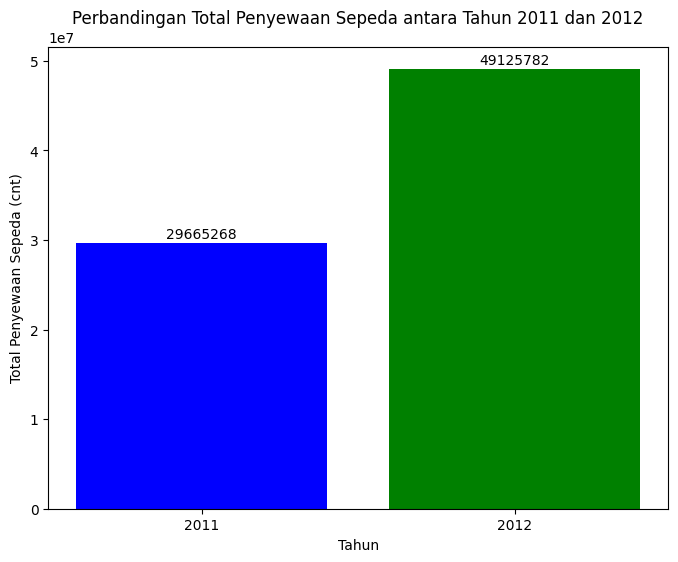

In [21]:
years = ['2011', '2012']
total_rentals = [total_rentals_2011, total_rentals_2012]

# Membuat bar plot
plt.figure(figsize=(8, 6))
plt.bar(years, total_rentals, color=['blue', 'green'])

plt.xlabel('Tahun')
plt.ylabel('Total Penyewaan Sepeda (cnt)')
plt.title('Perbandingan Total Penyewaan Sepeda antara Tahun 2011 dan 2012')

for i in range(len(years)):
    plt.text(i, total_rentals[i] + 500000, str(total_rentals[i]), ha='center')

plt.show()

### Pertanyaan 2: Apakah kecenderungan jumlah penyewaan sepeda (cnt) berbeda antara hari kerja (workingday) dan hari libur (holiday)?

Visualisasi

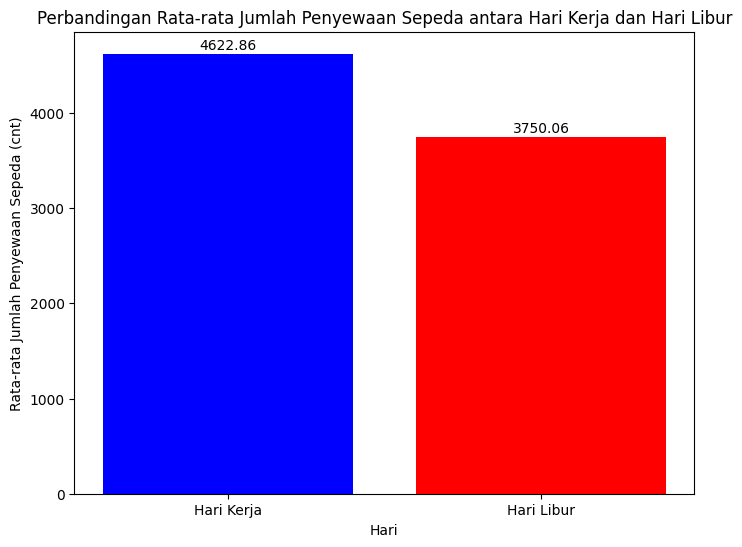

In [22]:
categories = ['Hari Kerja', 'Hari Libur']
avg_rentals = [avg_rentals_workingday, avg_rentals_holiday]

# Membuat bar plot
plt.figure(figsize=(8, 6))
plt.bar(categories, avg_rentals, color=['blue', 'red'])

plt.xlabel('Hari')
plt.ylabel('Rata-rata Jumlah Penyewaan Sepeda (cnt)')
plt.title('Perbandingan Rata-rata Jumlah Penyewaan Sepeda antara Hari Kerja dan Hari Libur')

for i in range(len(categories)):
    plt.text(i, avg_rentals[i] + 50, str(round(avg_rentals[i], 2)), ha='center')

plt.show()

Kesimpulannya iya berbeda antar hari kerja (workingday) dengan hari libur (holiday). Didapatkan bahwa rata-rata jumlah penyewaan sepeda paling tinggi pada hari kerja atau workingday.

### Pertanyaan 3: Bagaimana pengaruh kelembaban udara (hum) dan kecepatan angin (windspeed) terhadap jumlah penyewaan sepeda (cnt)?

In [23]:
correlation_matrix = merged_data[['hum', 'windspeed', 'cnt']].corr()

print("Korelasi antara kelembaban udara (hum) dan jumlah penyewaan sepeda (cnt):", correlation_matrix.loc['hum', 'cnt'])
print("Korelasi antara kecepatan angin (windspeed) dan jumlah penyewaan sepeda (cnt):", correlation_matrix.loc['windspeed', 'cnt'])

Korelasi antara kelembaban udara (hum) dan jumlah penyewaan sepeda (cnt): -0.09165714029096364
Korelasi antara kecepatan angin (windspeed) dan jumlah penyewaan sepeda (cnt): -0.23133980983272015


Visualisasi

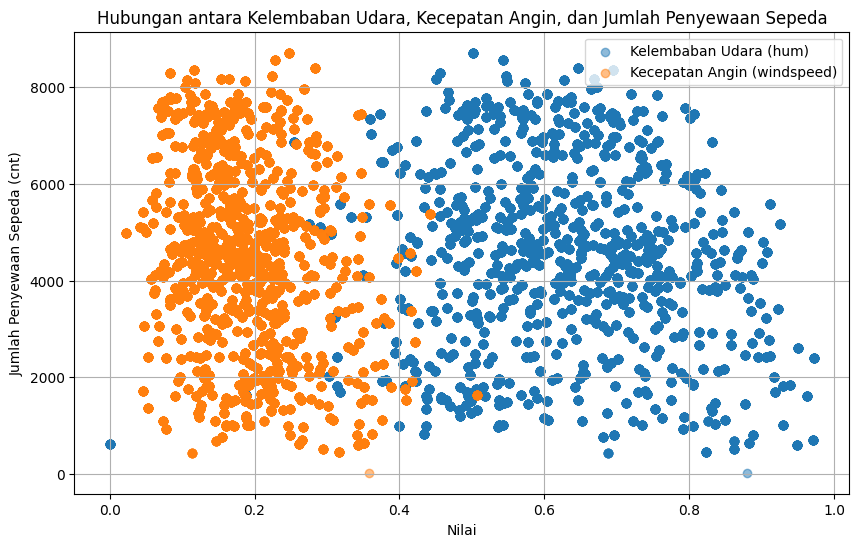

In [24]:
#Membuat scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(merged_data['hum'], merged_data['cnt'], label='Kelembaban Udara (hum)', alpha=0.5)
plt.scatter(merged_data['windspeed'], merged_data['cnt'], label='Kecepatan Angin (windspeed)', alpha=0.5)

plt.title('Hubungan antara Kelembaban Udara, Kecepatan Angin, dan Jumlah Penyewaan Sepeda')
plt.xlabel('Nilai')
plt.ylabel('Jumlah Penyewaan Sepeda (cnt)')

plt.legend()

plt.grid(True)
plt.show()

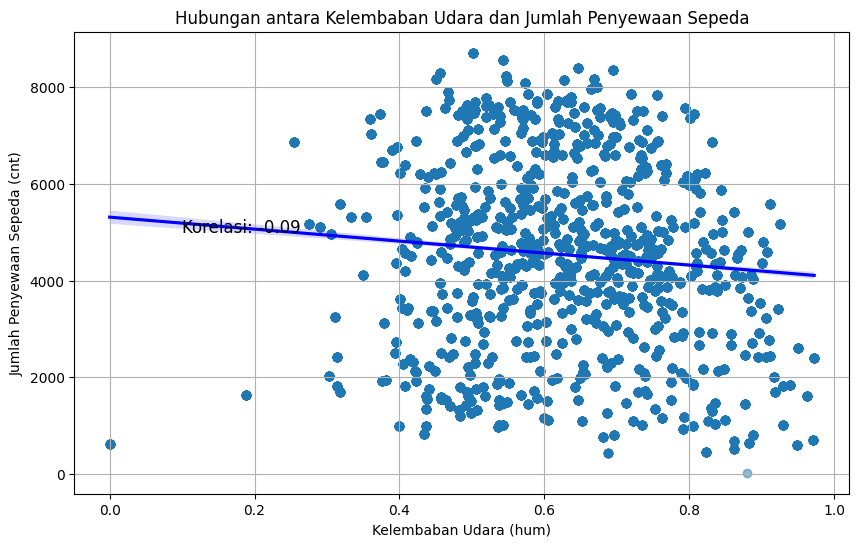

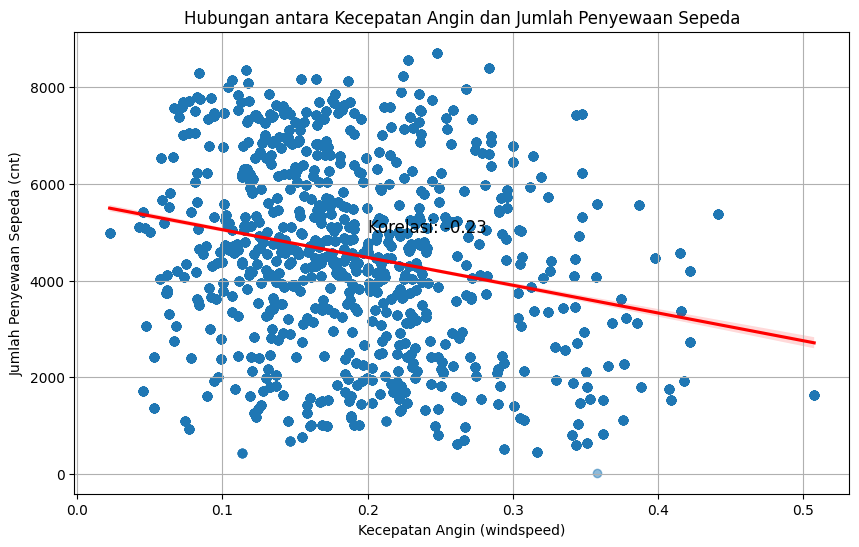

In [25]:
# Membuat scatter plot untuk kelembaban udara dan jumlah penyewaan sepeda
plt.figure(figsize=(10, 6))
sns.regplot(x='hum', y='cnt', data=merged_data, scatter_kws={'alpha':0.5}, line_kws={'color':'blue'})
plt.title('Hubungan antara Kelembaban Udara dan Jumlah Penyewaan Sepeda')
plt.xlabel('Kelembaban Udara (hum)')
plt.ylabel('Jumlah Penyewaan Sepeda (cnt)')
plt.grid(True)
plt.text(0.1, 5000, f"Korelasi: {merged_data['hum'].corr(merged_data['cnt']):.2f}", fontsize=12)

# Menampilkan scatter plot untuk kecepatan angin dan jumlah penyewaan sepeda
plt.figure(figsize=(10, 6))
sns.regplot(x='windspeed', y='cnt', data=merged_data, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Hubungan antara Kecepatan Angin dan Jumlah Penyewaan Sepeda')
plt.xlabel('Kecepatan Angin (windspeed)')
plt.ylabel('Jumlah Penyewaan Sepeda (cnt)')
plt.grid(True)
plt.text(0.2, 5000, f"Korelasi: {merged_data['windspeed'].corr(merged_data['cnt']):.2f}", fontsize=12)

plt.show()

Kesimpulannya adalah kelembaban udara (hum) tidak berpengaruh yang signifikan terhadap jumlah penyewaan sepeda, sedangkan kecepatan angin (windspeed) berpengaruh yang sedikit lebih signifikan, meskipun tidak terlalu kuat. Hal ini ditunjukkan pada angka korelasi. Dimana nilain korelasi kelembaban udara dan jumlah penyewaan sepeda mendekati 0 maka tidak ada hubungan linier yang signifikan. Sedangkan nilai korelasi yang negatif menunjukkan hubungan negatif antara kecepatan angin dan jumlah penyewaan sepeda. Namun, nilai korelasi yang cukup kecil menunjukkan bahwa hubungan ini tidak terlalu kuat. Artinya, meskipun ada kecenderungan bahwa semakin tinggi kecepatan angin, jumlah penyewaan sepeda cenderung lebih rendah, namun hubungannya tidak begitu kuat.

### Pertanyaan 4: Apakah terdapat tren jangka panjang dalam jumlah penyewaan sepeda (cnt) di setiap hari?

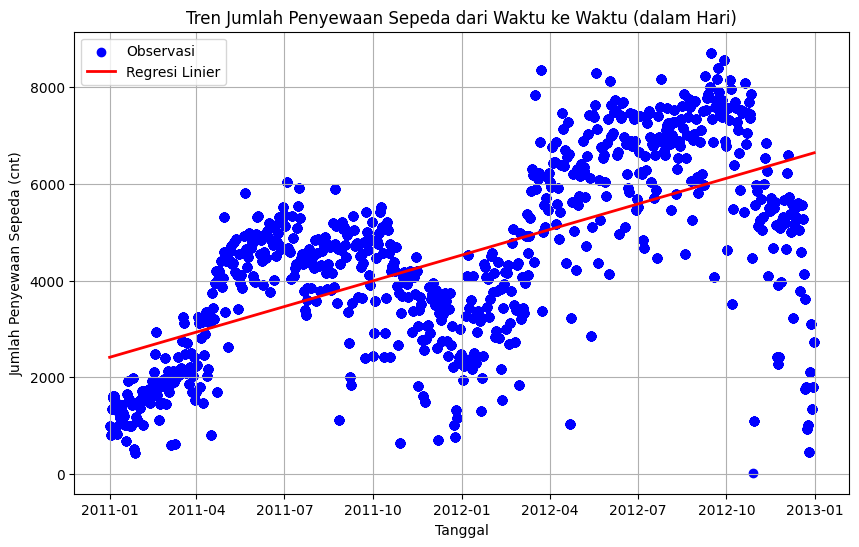

In [26]:
# Mengubah atribut tanggal menjadi tipe data datetime
merged_data['dteday'] = pd.to_datetime(merged_data['dteday'])

# Menghitung selisih waktu dalam hari dari tanggal awal
merged_data['days_since_start'] = (merged_data['dteday'] - merged_data['dteday'].min()).dt.days

# Mengambil waktu dalam persatuan hari
time_data = merged_data['days_since_start'].values.reshape(-1, 1)

# Mengambil data jumlah penyewaan sepeda (cnt)
rentals_data = merged_data['cnt'].values

# Membuat model regresi linier
model = LinearRegression()
model.fit(time_data, rentals_data)

# Memprediksi jumlah penyewaan sepeda menggunakan model regresi linier
predicted_rentals = model.predict(time_data)

# Menampilkan plot hasil regresi linier
plt.figure(figsize=(10, 6))
plt.scatter(merged_data['dteday'], rentals_data, color='blue', label='Observasi')
plt.plot(merged_data['dteday'], predicted_rentals, color='red', linewidth=2, label='Regresi Linier')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Penyewaan Sepeda (cnt)')
plt.title('Tren Jumlah Penyewaan Sepeda dari Waktu ke Waktu (dalam Hari)')
plt.legend()
plt.grid(True)
plt.show()

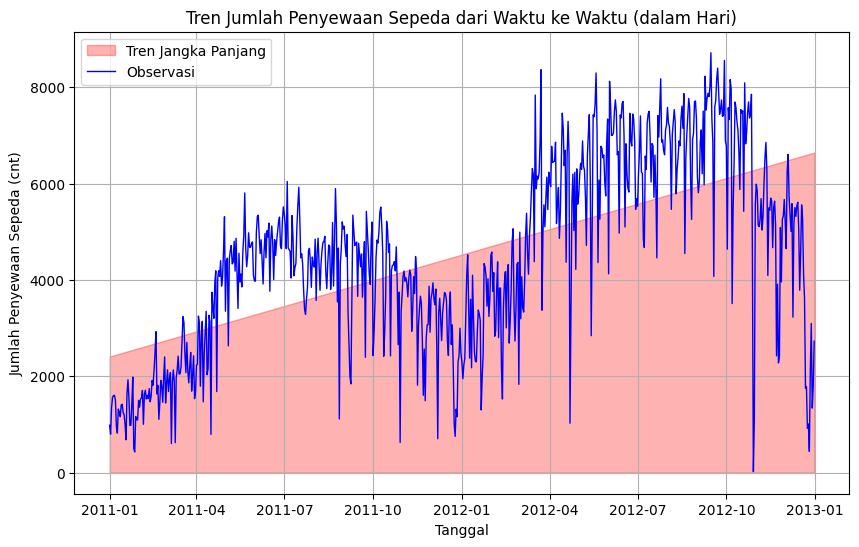

In [27]:
# Menggunakan area plot untuk menyoroti tren jangka panjang
plt.figure(figsize=(10, 6))
plt.fill_between(merged_data['dteday'], predicted_rentals, color='red', alpha=0.3, label='Tren Jangka Panjang')
plt.plot(merged_data['dteday'], rentals_data, color='blue', label='Observasi', linewidth=1)
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Penyewaan Sepeda (cnt)')
plt.title('Tren Jumlah Penyewaan Sepeda dari Waktu ke Waktu (dalam Hari)')
plt.legend()
plt.grid(True)
plt.show()


Kesimpulan dari grafik menunjukkan pola umum di mana jumlah penyewaan sepeda cenderung meningkat seiring berjalannya waktu. Hal ini menunjukkan adanya peningkatan peminatan penyewaan sepeda dari hari ke hari.

## Conclusion

- Conclution pertanyaan 1: Kesimpulan pertanyaan 1 adalah iya, terdapat perbedaan dalam jumlah penyewaan sepeda. Didapatkan bahwa total penyewaan sepeda tahun 2012 lebih tinggi dibandingkan total penyewaan sepeda tahun 2011.
- Conclution pertanyaan 2: Kesimpulannya iya berbeda antar hari kerja (workingday) dengan hari libur (holiday). Didapatkan bahwa rata-rata jumlah penyewaan sepeda paling tinggi pada hari kerja atau workingday.
- Conclution pertanyaan 3: Kesimpulannya adalah kelembaban udara (hum) tidak berpengaruh yang signifikan terhadap jumlah penyewaan sepeda, sedangkan kecepatan angin (windspeed) berpengaruh yang sedikit lebih signifikan, meskipun tidak terlalu kuat. Hal ini ditunjukkan pada angka korelasi. Dimana nilain korelasi kelembaban udara dan jumlah penyewaan sepeda mendekati 0 maka tidak ada hubungan linier yang signifikan. Sedangkan nilai korelasi yang negatif menunjukkan hubungan negatif antara kecepatan angin dan jumlah penyewaan sepeda. Namun, nilai korelasi yang cukup kecil menunjukkan bahwa hubungan ini tidak terlalu kuat. Artinya, meskipun ada kecenderungan bahwa semakin tinggi kecepatan angin, jumlah penyewaan sepeda cenderung lebih rendah, namun hubungannya tidak begitu kuat.
- Conclution pertanyaan 4: Kesimpulan dari grafik menunjukkan pola umum di mana jumlah penyewaan sepeda cenderung meningkat seiring berjalannya waktu. Hal ini menunjukkan adanya peningkatan peminatan penyewaan sepeda dari hari ke hari.